<a href="https://colab.research.google.com/github/cristian-rincon/escuela-datascience/blob/master/manipulacion_datos_pandas/16_pandas_routine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rutina de preprocesamiento de datos con Pandas

## Dataset a usar en esta rutina:


Temperature (°C) https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalLandTemperaturesByCountry.csv

Para evitar la descarga local del archivo, realizaremos unos pasos aprovechando la API de Kaggle, de tal forma que podamos descargar el archivo directamente en drive.

### 1. Instalando kaggle

In [ ]:
! pip install -q kaggle

### 2. Importando el sistema de archivos que nos provee Colab

In [ ]:
from google.colab import files

### 3. Creación y carga de API key

3.1. Lo primero que debemos hacer es ir a [Kaggle](https://www.kaggle.com/) > account y con el mouse bajamos hasta la opción API.

3.2. Una vez allí, hacemos click en la opción **Create New API Token**, lo cual descargará un archivo _.json_ que nos permitirá conectarnos a la api de Kaggle.

3.3. Ahora usaremos el módulo de files para cargar el archivo en nuestro sistema local.

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cristianrincon","key":"5c50bee4a04b2ff77b36cc4f8cf6d5a1"}'}

3.4. Creamos una carpeta oculta en el sistema de archivos con el nombre _.kaggle_.

In [ ]:
 ! mkdir ~/.kaggle

3.5. Copiamos el archivo de credenciales que subimos en el paso 3.3 a la carpeta que creamos previamente.

In [ ]:
! cp kaggle.json ~/.kaggle/

3.6. Cambiamos los permisos para permitir lectura de las credenciales.

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

### 4. Probando la conexión a la API de Kaggle

vamos utilizar el comando para listar algunos de los datasets que tenemos disponibles para consulta y verificar de esta forma que nos permita conectarnos de manera correcta.

In [ ]:
! kaggle datasets list

ref                                                               title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
gpreda/covid19-tweets                                             COVID19 Tweets                                    21MB  2020-08-14 07:51:12           2064  
christianlillelund/passenger-list-for-the-estonia-ferry-disaster  The Estonia Disaster Passenger List               14KB  2020-07-26 15:40:17            576  
futurecorporation/epitope-prediction                              COVID-19/SARS B-cell Epitope Prediction            1MB  2020-07-24 02:53:28            488  
Cornell-University/arxiv                                          arXiv Dataset                                    877MB  2020-08-14 23:50:57           1359  
vidyapb/indian-school-education-statistics    

### 5. Descargando un archivo desde Kaggle a nuestro Drive

5.1. Para este paso podemos ir a la página principal del dataset que queremos descargar.
5.2. Hacemos click en el botón a la derecha de **New Notebook**, lo cual desplegará un menú y en él seleccionaremos la opción **Copy API Command**.

5.3. Usaremos el comando para descargar datasets desde kaggle 

```shell
! kaggle datasets download -d <ruta del dataset en kaggle, copiada al presionar el botón Copy API Command>
```

In [ ]:
! kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

 96% 81.0M/84.7M [00:04<00:00, 13.6MB/s]
100% 84.7M/84.7M [00:04<00:00, 18.6MB/s]


## Bonus - Activar la unidad de drive para usarla en Colab

### 1. Importamos la librería ``drive`` desde ``google.colab``

1.2. Usamos el método mount para especificar la unidad a montar.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### 2. Descomprimir el archivo desde drive

2.1. Creamos el directorio donde queremos guardar nuestro archivo descomprimido con el comando:

```bash
!mkdir '/content/drive/My Drive/Colab Notebooks/db/'
```

In [ ]:
# !mkdir '/content/drive/My Drive/Colab Notebooks/manipulacion_datos_pandas/db/'

2.2. Finalmente, descomprimiremos el archivo utilizando el comando unzip de la siguiente forma:

```bash
!unzip <archivo a descomprimir> -d <'ruta de destino del archivo'>
```

In [ ]:
!unzip climate-change-earth-surface-temperature-data.zip -d '/content/drive/My Drive/Colab Notebooks/manipulacion_datos_pandas/db/'

Archive:  climate-change-earth-surface-temperature-data.zip
  inflating: /content/drive/My Drive/Colab Notebooks/manipulacion_datos_pandas/db/GlobalLandTemperaturesByCity.csv  
  inflating: /content/drive/My Drive/Colab Notebooks/manipulacion_datos_pandas/db/GlobalLandTemperaturesByCountry.csv  
  inflating: /content/drive/My Drive/Colab Notebooks/manipulacion_datos_pandas/db/GlobalLandTemperaturesByMajorCity.csv  
  inflating: /content/drive/My Drive/Colab Notebooks/manipulacion_datos_pandas/db/GlobalLandTemperaturesByState.csv  
  inflating: /content/drive/My Drive/Colab Notebooks/manipulacion_datos_pandas/db/GlobalTemperatures.csv  


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/manipulacion_datos_pandas/db

/content/drive/My Drive/Colab Notebooks/manipulacion_datos_pandas/db


In [6]:
!ls

GlobalLandTemperaturesByCity.csv       GlobalLandTemperaturesByState.csv
GlobalLandTemperaturesByCountry.csv    GlobalTemperatures.csv
GlobalLandTemperaturesByMajorCity.csv


In [3]:
import pandas as pd
import numpy as np

In [8]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [5]:
df_temp.shape

(577462, 4)

In [10]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [9]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [12]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [13]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp =df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [19]:
df_t_avg = df_temp.groupby(['Country',
                 pd.Grouper(key='year',freq='1Y')
]).agg({'AverageTemperature':[np.mean,np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

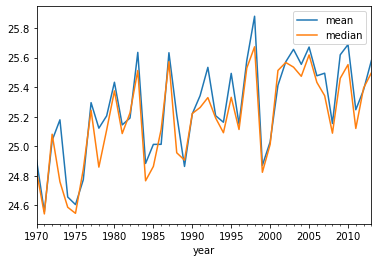

In [26]:
df_t_avg.xs('Colombia')['AverageTemperature'].plot()

In [28]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [29]:
df_t_med['date']=df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [30]:
df_t_med.rename(columns={
    'median':'temperature'
}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [32]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,11.1180,28.6180,8.6480,21.9360,6.3550,12.4300,25.6190,27.4460,25.5650,27.9370,27.0110,6.5360,10.6590,26.4620,27.0670,13.1690,21.9350,28.3010,10.0870,23.4400,25.4440,26.7220,11.5200,28.1070,25.7410,19.9750,27.1040,24.4220,-1.6320,24.7480,...,22.6690,1.2720,14.4880,13.7550,27.6430,28.3390,26.4830,-5.8620,19.2560,3.2700,7.4020,19.4770,24.2230,6.4740,22.3660,26.8520,26.8290,27.0600,23.6180,26.4450,20.1740,12.9030,17.4190,26.8910,22.8360,10.0670,28.9860,9.7340,9.9730,8.2860,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,8.6390,28.0850,8.1845,22.2985,7.1385,10.7060,25.4960,25.5135,25.3280,26.3180,26.4790,5.7755,10.0065,25.2630,26.9295,12.6415,21.2455,27.2900,10.1885,23.9550,24.9120,26.2470,9.5820,27.9310,24.7345,19.6260,27.0150,24.0725,-3.4755,23.6530,...,21.9110,1.5420,11.9565,12.6455,27.1535,27.9145,25.8920,-10.5280,19.5295,1.6720,8.5215,17.1220,22.1795,5.8390,22.3920,26.6300,26.4135,26.3805,23.8420,26.0095,19.6470,10.6395,14.9685,26.7755,22.7355,7.4325,27.8175,8.7785,8.9780,8.7545,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,11.4950,28.6780,8.6445,22.3470,5.3755,13.6880,25.8145,26.3535,26.0285,26.9035,27.0225,6.0925,8.7840,25.8145,26.7025,12.5800,21.9525,27.8050,9.7260,23.0225,25.1430,26.6150,10.6495,28.2305,25.4830,20.0425,27.2160,24.1850,-6.6775,23.6670,...,22.3110,0.4455,12.5585,12.2105,27.4820,28.9775,26.1590,-5.9665,19.9670,2.2865,6.1615,19.4300,23.0640,4.9110,22.6910,26.9205,26.2535,27.0445,23.2235,26.4690,18.6385,13.2440,16.3415,27.1115,23.2850,9.0295,28.0485,8.6235,8.7990,8.2290,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,9.7335,28.1630,8.5830,22.9775,4.5905,11.8825,25.5835,27.0690,25.9215,27.1555,26.8725,5.7910,8.0960,26.4840,27.3385,13.5435,22.4190,27.7220,9.3100,23.6135,25.2795,27.0685,10.5565,28.4860,25.4180,20.2410,27.4025,24.6665,-3.6645,24.5360,...,22.4800,1.6770,12.8265,12.3910,27.5945,28.6225,26.4350,-9.6135,18.8930,0.4795,5.1230,18.9260,23.2600,5.5885,22.7820,26.9290,27.0445,26.9310,23.9020,26.4575,19.6385,12.1315,15.8780,26.8120,23.0450,8.5070,28.7285,7.4480,7.5175,8.8785,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,9.3265,27.7935,8.3875,21.6105,5.1555,11.6075,25.2450,26.3585,25.4955,27.2765,26.7885,6.1085,8.3310,25.6020,26.7790,14.0195,21.2395,27.3970,8.3580,22.0050,24.7665,26.1720,10.4035,27.0055,25.5345,19.8995,27.2265,24.0195,-6.0400,23.3540,...,21.8890,1.4885,12.2490,10.8630,27.2295,28.1990,25.8925,-7.0340,19.3190,2.4690,5.4260,19.1350,22.9360,5.6675,22.3410,26.7550,26.4965,26.4465,23.8720,26

AttributeError: ignored

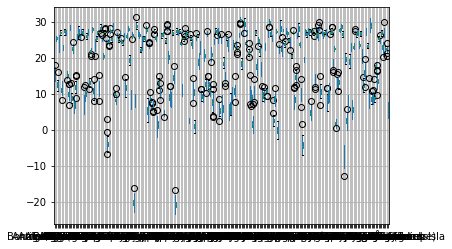

In [40]:
df_t_pivot.boxplot()

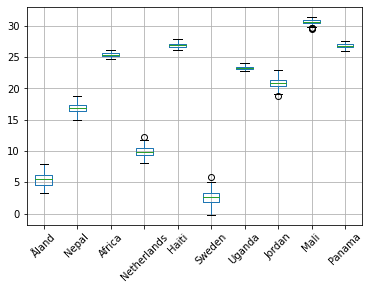

In [45]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)

## Nuevos sets de datos

Topic https://data.worldbank.org/topic/climate-change

CO2 (kt) https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

Forest (km2) https://data.worldbank.org/indicator/AG.LND.FRST.K2

Agricultura (km2) https://data.worldbank.org/indicator/AG.LND.AGRI.K2

Population (7mM) https://data.worldbank.org/indicator/SP.POP.TOTL

Electric power consumption (kWh per capita) https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC

In [50]:
!ls

API_AG.LND.AGRI.K2_DS2_en_csv_v2_1219309.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_1221041.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_1221097.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.csv
API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv
GlobalLandTemperaturesByCity.csv
GlobalLandTemperaturesByCountry.csv
GlobalLandTemperaturesByMajorCity.csv
GlobalLandTemperaturesByState.csv
GlobalTemperatures.csv


In [90]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_1219309.csv',header=2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_1221041.csv',header=2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_1221097.csv',header=2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.csv',header=2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv',header=2)

In [91]:
range(1971,2015)
cols = ['Country Name','Country Code'] + list(map(str,range(1971,2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [92]:
def fun_format(df, col = 'agriculture'):
    return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
        columns={
            'variable':'date',
            'Country Name':'Country',
            'Country Code':'name',
            'value':col
        }
    )

In [93]:
df_agri = fun_format(df_agri, col='agriculture')
df_fore = fun_format(df_fore, col='forest')
df_elec = fun_format(df_elec, col='electricprod')
df_co2e = fun_format(df_co2e, col='co2')
df_popu = fun_format(df_popu, col='population')

In [94]:
df_agri['date'] = df_agri['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu['date'] = df_popu['date'].astype(float)

In [67]:
#df_t_med

In [95]:
df_merge = pd.merge(df_t_med[['Country','temperature','date']],
                    df_agri, on=['Country','date'], how = 'inner')


In [96]:
df_merge = pd.merge(df_merge,
                    df_fore, on=['Country','name','date']
                    ,how = 'inner')
df_merge = pd.merge(df_merge,
                    df_elec, on=['Country','name','date']
                    ,how = 'inner')
df_merge = pd.merge(df_merge,
                    df_co2e, on=['Country','name','date']
                    ,how = 'inner')
df_merge = pd.merge(df_merge,
                    df_popu, on=['Country','name','date']
                    ,how = 'inner')

In [97]:
df_merge

,Country,temperature,date,name,agriculture,forest,electricprod,co2,population
0,Afghanistan,14.9340,1971,AFG,380360.0,NaN,NaN,1895.839,11475445.0
1,Afghanistan,13.8725,1972,AFG,380460.0,NaN,NaN,1532.806,11791215.0
2,Afghanistan,14.9130,1973,AFG,380480.0,NaN,NaN,1639.149,12108963.0
3,Afghanistan,13.6160,1974,AFG,380480.0,NaN,NaN,1917.841,12412950.0
4,Afghanistan,13.5130,1975,AFG,380480.0,NaN,NaN,2126.860,12689160.0
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,163000.0,159510.000000,585.456912,5603.176,12526968.0
7220,Zimbabwe,23.3040,2010,ZWE,162000.0,156240.000000,606.644199,7803.376,12697723.0
7221,Zimbabwe,22.9420,2011,ZWE,164000.0,153115.996094,636.249337,9622.208,12894316.0
7222,Zimbabwe,23.0455,2012,ZWE,162000.0,149992.001953,608.762505,7873.049,13115131.0


In [98]:
df_merge.dropna()

,Country,temperature,date,name,agriculture,forest,electricprod,co2,population
62,Albania,13.4490,1990,ALB,11210.0,7887.999878,552.252185,5515.168,3286542.0
63,Albania,11.5885,1991,ALB,11270.0,7868.499756,418.453589,4286.723,3266790.0
64,Albania,13.5850,1992,ALB,11270.0,7849.000244,453.644074,2515.562,3247039.0
65,Albania,13.6500,1993,ALB,11260.0,7829.500122,536.363825,2335.879,3227287.0
66,Albania,13.2390,1994,ALB,11260.0,7810.000000,596.407959,1925.175,3207536.0
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,163000.0,159510.000000,585.456912,5603.176,12526968.0
7220,Zimbabwe,23.3040,2010,ZWE,162000.0,156240.000000,606.644199,7803.376,12697723.0
7221,Zimbabwe,22.9420,2011,ZWE,164000.0,153115.996094,636.249337,9622.208,12894316.0
7222,Zimbabwe,23.0455,2012,ZWE,162000.0,149992.001953,608.762505,7873.049,13115131.0
